# **Introduction to OpenCV, Matplotlib Basics and Numpy**


---



### Welcome to this IPython Notebook, where we will explore the fundamentals of Python programming language needed for two powerful libraries: OpenCV and Matplotlib. Whether you're new to programming or have experience in other languages, this notebook will serve as a comprehensive introduction to using OpenCV for computer vision tasks and Matplotlib for data visualization.


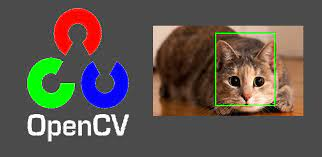

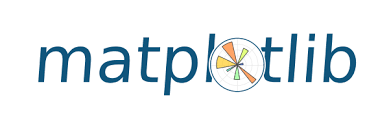

<p>
 Estimated time needed: <strong>35-40 min</strong>
</p>

# Introduction to Numpy

## The Basics

NumPy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

### Arrays

* NumPy’s main object is the **homogeneous multidimensional array**. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers.

* In NumPy dimensions are called **axes**. For example, the coordinates of a point in 3D space [1, 2, 1] has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.


* **ndarray.ndim**: the number of axes (dimensions) of the array.

* **ndarray.shape**: the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be `(n, m)`. The length of the shape tuple is therefore the number of axes, `ndim`.

* **ndarray.size**: the total number of elements of the array. This is equal to the product of the elements of shape.

* **ndarray.dtype**: an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

* **ndarray.itemsize**: the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (= 32/8). It is equivalent to ndarray.dtype.itemsize.

* **ndarray.data**: the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(a)
print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


In [3]:
# Print the shape of the array 'a'
print(a.shape)

# Print the values at indices 0, 1, and 2 of the array 'a'
print(a[0], a[1], a[2])

# Assign the value 5 to the element at index 0 of the array 'a'
a[0] = 5

# Print the updated array 'a' after modifying the element at index 0
print(a)

(3,)
1 2 3
[5 2 3]


In [4]:
# Create a rank 2 array 'b' using the np.array function
b = np.array([[1, 2, 3], [4, 5, 6]])

# Print the shape of the array 'b'
print(b.shape)
print(b)

# Print the values at specific indices of the array 'b'
print(b[0, 0], b[0, 1], b[1, 2])

# Another way to access values at specific indices using separate indexing
print(b[0][0], b[0][1], b[1][2])

# Print the number of dimensions of the array 'b' using ndim attribute
print(b.ndim, type(b.ndim))

# Print the total number of elements in the array 'b' using size attribute
print(b.size, type(b.size))

# Print the data type of the elements in the array 'b' using dtype attribute
print(b.dtype, type(b.dtype))

# Print the name of the data type of the elements in the array 'b' using dtype.name attribute
print(b.dtype.name, type(b.dtype.name))

# Print the size in bytes of each element in the array 'b' using itemsize attribute
print(b.itemsize, type(b.itemsize))


(2, 3)
[[1 2 3]
 [4 5 6]]
1 2 6
1 2 6
2 <class 'int'>
6 <class 'int'>
int64 <class 'numpy.dtype[int64]'>
int64 <class 'str'>
8 <class 'int'>


## Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [5]:
# Create a NumPy array 'a' with integer values
a = np.array([2, 3, 4])

# Print the data type of the elements in array 'a' using the dtype attribute
print(a.dtype)  # Output: int64

# Create a NumPy array 'b' with floating-point values
b = np.array([1.2, 3.5, 5.1])

# Print the data type of the elements in array 'b' using the dtype attribute
print(b.dtype)  # Output: float64


int64
float64


A frequent error consists in calling array with multiple arguments, rather than providing a single sequence as an argument.

In [6]:
a = np.array(1, 2, 3, 4)    # WRONG

a = np.array([1, 2, 3, 4])  # RIGHT

TypeError: ignored

`array` transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [7]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

The function `zeros` creates an array full of zeros, the function `ones` creates an array full of ones, and the function `empty` creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is `float64`, but it can be specified via the key word argument `dtype`.

In [8]:
a = np.zeros((2, 2))
print(a)
print("*" * 65)

a_2 = np.zeros(2)
print(a_2)
print("*" * 65)

b =  np.ones((1, 2))
print(b)
print("*" * 65)

c = np.arange(3, 7, 2)
print(c)
print("*" * 65)

d = np.linspace(2.0, 3.0, num=5)
print(d)
print("*" * 65)

e = np.random.random((2, 2))
print(e)
print("*" * 65)

[[0. 0.]
 [0. 0.]]
*****************************************************************
[0. 0.]
*****************************************************************
[[1. 1.]]
*****************************************************************
[3 5]
*****************************************************************
[2.   2.25 2.5  2.75 3.  ]
*****************************************************************
[[0.87659698 0.88361664]
 [0.26246612 0.75200875]]
*****************************************************************


### Basic Operations

Arithmetic operators on arrays apply *elementwise*. A new array is created and filled with the result.

In [9]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(a)
print(b)
c = a - b
print(c)
print(np.subtract(a, b))
print(np.add(a, b))
print(b**2)
print(10 * np.sin(a))
print(a < 35)
print(type(a < 35))

[20 30 40 50]
[0 1 2 3]
[20 29 38 47]
[20 29 38 47]
[20 31 42 53]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]
<class 'numpy.ndarray'>


Basic matrix multiplication

In [10]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])

print(A * B)     # elementwise product
print("*" * 65)

print(np.multiply(A, B))
print("*" * 65)

print(A @ B)     # matrix product
print("*" * 65)

print(A.dot(B))  # another matrix product
print("*" * 65)

print(np.dot(A, B))
print("*" * 65)

print(np.dot(B, A))
print("*" * 65)

[[2 0]
 [0 4]]
*****************************************************************
[[2 0]
 [0 4]]
*****************************************************************
[[5 4]
 [3 4]]
*****************************************************************
[[5 4]
 [3 4]]
*****************************************************************
[[5 4]
 [3 4]]
*****************************************************************
[[2 2]
 [3 7]]
*****************************************************************


Array indexing

In [11]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

[[2 3]
 [6 7]]
2
77


Should we blur the image?

## Introduction to Matplotlib

### Matplotlib, a powerful data visualization library in Python, empowers users to create captivating visualizations by seamlessly displaying images, plots, charts, and graphs. With its extensive range of functionalities and cross-platform compatibility, Matplotlib enables users to effectively communicate and analyze data through visually engaging representations.

Before we dive into the main functionalities of Matplotlib, here are a few things to look into in order to have a better understanding:

### Importing Matplotlib

Just as we use the `np` shorthand for NumPy we will use some standard shorthands for Matplotlib imports:

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The `plt` interface is what we will use most often, as you shall see throughout this part of the book.

### Visualizing Trigonometric Functions with Matplotlib

In this introductory example, we leverage the power of Matplotlib to visualize the trigonometric functions, sine and cosine. By plotting the values of these functions against a range of values using NumPy arrays, we create a clear representation of their periodic patterns. The resulting plot showcases the versatility of Matplotlib in generating visually appealing and informative graphs, setting the stage for further exploration of data visualization techniques in this notebook.

(100,)


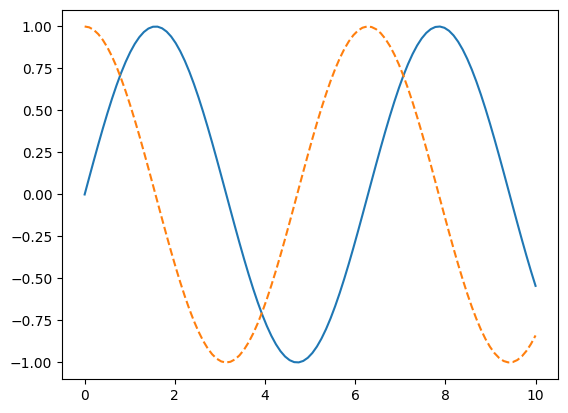

In [13]:
import numpy as np
x = np.linspace(0, 10, 100)

print(x.shape)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures as Image Files

A convenient feature of Matplotlib is the capability to save figures in a diverse range of formats. The process of saving a figure involves using the savefig command. As an illustration, if we want to save the previous figure as a PNG file, we can execute the following code snippet:*italicized text*

In [14]:
fig.savefig('my_image.jpg')

### To confirm that it contains what we think it contains, let's use the IPython `Image` object to display the contents of this file (see the following figure):

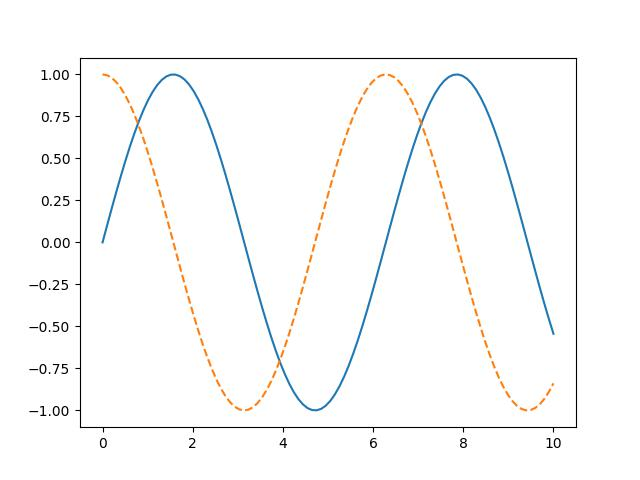

In [15]:
from IPython.display import Image
Image('my_image.jpg')

### Now that we have explored some of the basic operations and functionalities of Matplotlib, we can transition towards delving into the powerful realm of OpenCV. While Matplotlib allows us to create and customize visualizations, OpenCV provides an extensive set of tools and algorithms for image and video processing, object detection, and more. Let's now embark on our journey into OpenCV, where we will discover how to manipulate and analyze images using this versatile computer vision library.

## Introduction to OpenCV

This notebook covers opening files, looking at pixels, and some simple image processing techniques. For our upcoming demonstrations in OpenCV, we will utilize the following example image as our working sample. This chosen image will serve as a practical illustration to showcase the various image processing techniques and functionalities offered by OpenCV. With this sample image at our disposal, we can now delve into the exciting world of computer vision and explore the vast possibilities that OpenCV has to offer.

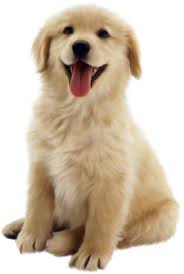


Import OpenCV-Python and other packages

In [16]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)


OpenCV-Python Version 4.7.0


To begin our exploration of image processing with OpenCV, we will load and display an image.

In [17]:
img = cv2.imread('/content/jethu.jpg', cv2.IMREAD_COLOR)

# If the image path is wrong, the resulting img will be none
if img is None:
    print('Open Error')
else:
    print('Image Loaded')

Image Loaded


In the below code, we perform the following operations and provide comments to explain their purpose:


1. Print the type of the image: The output indicates that the image is represented as a NumPy ndarray, which is a multi-dimensional array object.
2. Print the shape of the image: The shape shows the dimensions of the image, including the height, width, and number of color channels.
3. Print the data type of the image: The dtype represents the data type of the image pixels. In this case, it is uint8, which means it uses 8 bits to represent each color channel.



In [18]:
print("Type of img: ", type(img))
print("Shape of the img: ", img.shape)
print("Data type of the img: ", img.dtype)

Type of img:  <class 'numpy.ndarray'>
Shape of the img:  (169, 298, 3)
Data type of the img:  uint8


Here we display the loaded image using matplotlib



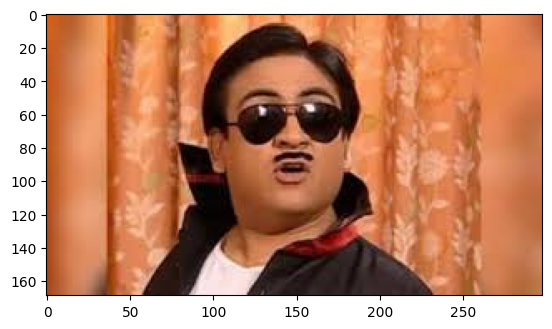

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

The code below illustrates something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

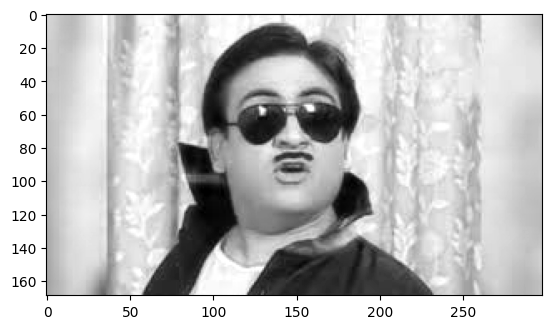

In [20]:
# split channels
b,g,r=cv2.split(img)

# show one of the channels (this is red)
plt.imshow(r, cmap='gray')

Let's split without using .split()

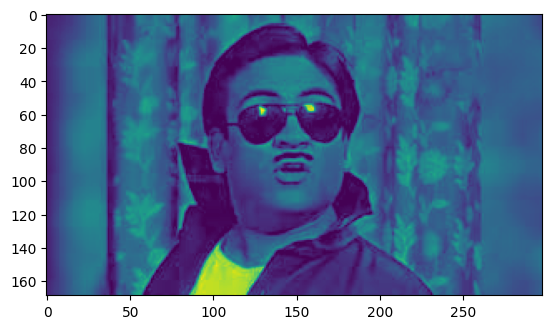

In [21]:
# Accessing the red channel
red_channel = img[:, :, 2]

# Accessing the green channel
green_channel = img[:, :, 1]

# Accessing the blue channel
blue_channel = img[:, :, 0]

plt.imshow(red_channel)
plt.imshow(green_channel)
plt.imshow(blue_channel)

We've seen how to split, above. We can also merge channels:

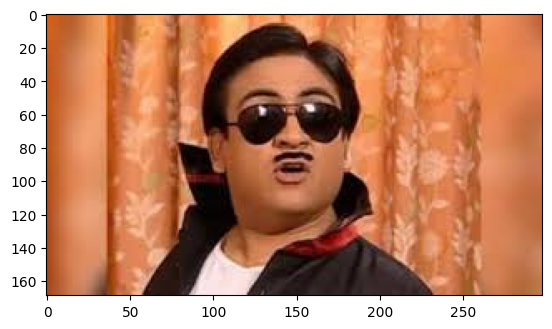

In [22]:
merged=cv2.merge([r,g,b])

# merge takes an array of single channel matrices
plt.imshow(merged)

### Accessing and Manipulating Image Data in OpenCV

In OpenCV, images are represented as NumPy arrays, which provide efficient array operations. NumPy offers optimized methods for array calculations, reducing the need to manually handle pixel-level details. While it is possible to access individual pixels, it is generally considered bad practice due to more efficient alternatives for array-level computations. Let's explore how to access and manipulate image data using NumPy arrays in OpenCV, taking advantage of its optimized functionality for efficient image processing tasks.

In [23]:
pixel = img[100,100]
print(pixel)

img[100,100] = [0,0,0]
pixelnew = img[100,100]
print(pixelnew)

[17 14 70]
[0 0 0]



### Accessing and Modifying Image Regions

Similar to accessing individual pixels, we can also retrieve or modify regions of an image. This approach is particularly valuable when we want to focus on specific regions of interest within an image. By extracting and working with these regions, we can perform targeted operations and analysis. This ability to access and modify image regions provides a convenient and efficient way to work on specific areas of interest within an image.

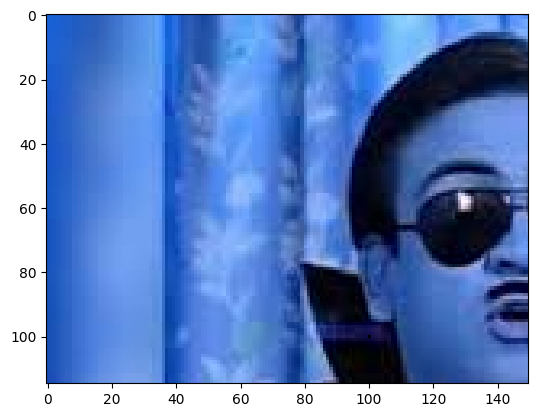

In [27]:
face = img[0:115, 0:150]
plt.imshow(face)

### Basic manipulations

In addition to accessing and modifying individual pixels or regions, OpenCV provides a wide range of built-in functions for performing basic image manipulations. These operations include rotation, flipping, and resizing, allowing us to transform and adjust images according to our requirements. By leveraging these basic image manipulations, we can enhance images, correct orientation, and prepare them for further analysis or visualization. In the upcoming sections, we will explore how to apply these transformations to images, providing valuable insights into the techniques and applications of image manipulation in OpenCV.

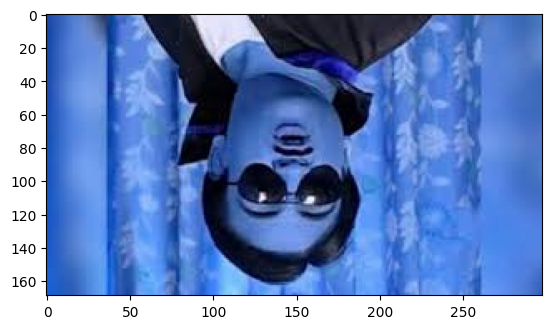

In [28]:
# vertical flip

flipped_code_0=cv2.flip(img, 0)
plt.imshow(flipped_code_0)

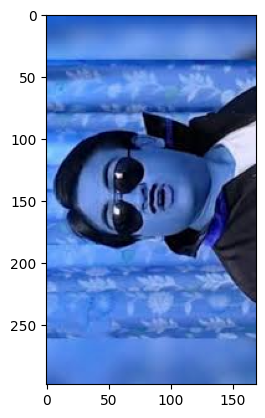

In [29]:
#transpose image

transposed=cv2.transpose(img)
plt.imshow(transposed)

Let's resize the image

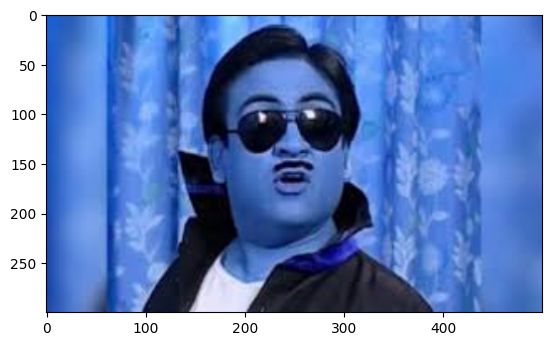

In [30]:
# Define the new dimensions for the resized image
new_width = 500
new_height = 300

# Resize the image
resized_image = cv2.resize(img, (new_width, new_height))

plt.imshow(resized_image)

We can draw a rectangle on this image!

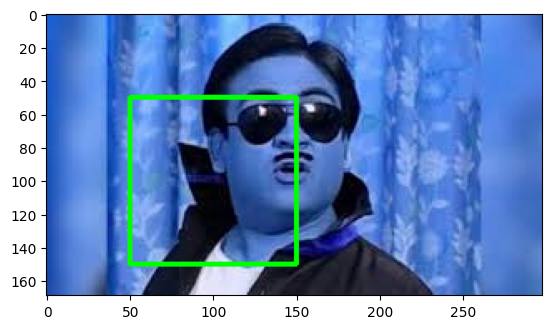

In [31]:
x = 50
y = 50
width = 100
height = 100

new_img = img
# Draw the rectangle on the image
cv2.rectangle(new_img, (x, y), (x + width, y + height), (0, 255, 0), 2)

plt.imshow(new_img)

### Finding Minimum and Maximum Values

To determine the minimum or maximum value of a matrix, you can utilize the minMaxLoc function in OpenCV. It is important to note that minMaxLoc operates on a single-channel image, as taking the maximum or minimum of a three-channel image might not be meaningful. In the following code snippet, you will observe a for loop that iterates over each channel of the input image individually, leveraging Python-style image slicing.

By employing this approach, we can examine and extract the minimum and maximum values for each channel of the image, facilitating analysis and further processing based on the specific channel values.

In [32]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


min 0.0 is at (130, 8), and max 254.0 is at (129, 58)
min 0.0 is at (125, 11), and max 255.0 is at (50, 49)
min 0.0 is at (50, 49), and max 255.0 is at (34, 0)


### Arithmetic Operations on Images

OpenCV provides a wide range of functions for performing arithmetic operations on images. While some of these operations have analogous counterparts in NumPy, it is generally recommended to use the OpenCV versions for image processing tasks. The reason for this is that OpenCV is specifically designed to handle overflow and other nuances that commonly occur in image data. For instance, the OpenCV `add` function truncates values to 255 if the datatype is image-like and 8-bit, while the NumPy alternative wraps around.

Some of the useful arithmetic operations in OpenCV include `add` and `addWeighted`, which allow combining two images of the same size. These operations provide flexibility and control over blending or merging images, enabling various image manipulation and enhancement techniques.

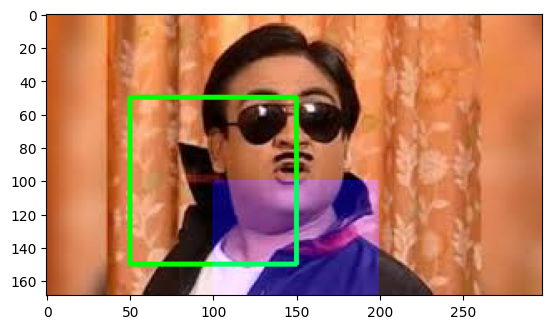

In [42]:
#First create an image the same size as our input
blank_image = np.zeros((img.shape), np.uint8)

#give it a green square
blank_image[100:200,100:200,0]=100;

# add the two images together
new_image=cv2.add(blank_image, img)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Can we add text on top of the image?

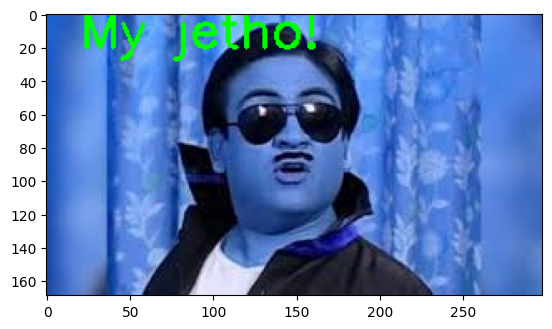

In [45]:
# Load the image
image = cv2.imread('jethu.jpg')

# Define the text to be added
text = "My jetho!"

# Define the position and font settings for the text
position = (20, 20)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (0, 255, 0)  # Green color
thickness = 2

# Add the text to the image
cv2.putText(image, text, position, font, font_scale, color, thickness)
plt.imshow(image)

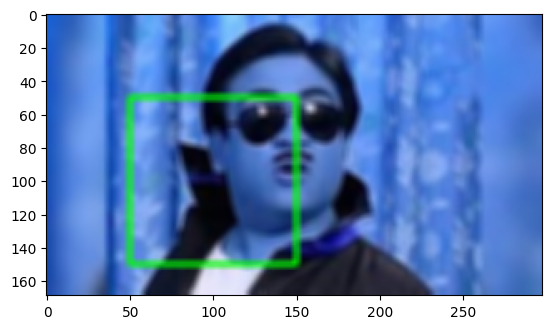

In [47]:
# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(img, (5, 5), 10)

plt.imshow(blurred_image)

Please use the following links for the reference:

1. https://cs231n.github.io/python-numpy-tutorial/#numpy
2. https://github.com/dalgu90/opencv-tutorial/blob/master/1_getting_started.ipynb
3. https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/1-Fundamentals.ipynb
4. https://medium.com/analytics-vidhya/introduction-to-opencv-cc771730577a
5. https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb
6. https://www.geeksforgeeks.org/using-matplotlib-with-jupyter-notebook/
7. https://notebook.community/DTUWindEnergy/Python4WindEnergy/lesson%203/results/tlbl
8. https://numpy.org/doc/stable/user/absolute_beginners.html
9. https://www.w3schools.com/python/numpy/numpy_intro.asp
10. https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html
